We will now evaluate the performance of the classifier
There are 2 evaluation formulas
1. Used by Sahami et.al
2. Used by Koutsias et.al

The formulas in 1: 
\begin{equation}
Recall = \frac{n_{S\rightarrow S}}{n_{S\rightarrow S} + n_{S\rightarrow L}}
\end{equation}

and

\begin{equation}
Precision= \frac{n_{S\rightarrow S}}{n_{S\rightarrow S} + n_{L\rightarrow S}}
\end{equation}


The second used Cost-Sensitive evaluation formulas:

\begin{equation}
WAccuracy= \frac{\lambda*n_{L\rightarrow L}+n_{S\rightarrow S}}{\lambda*n_{L} + n_{S}}
\end{equation}

\begin{equation}
WError= \frac{\lambda*n_{L\rightarrow S}+n_{S\rightarrow L}}{\lambda*n_{L} + n_{S}}
\end{equation}


**More Information:**

1. S-S : Number of emails that are `spam` and classified  as `spam`
2. S-L : Number of emails that are `spam` and classified  as `legit`
3. L-L : Number of emails that are `legit` and classified  as `legit`
4. L-S : Number of emails that are `legit` and classified  as `spam`
5. L   : Number of emails that are `legit`
6. S   : Number of emails that are `spam`
7. Lambda: Threshold used to determine if an email is spam, there were 3 thresholds used (1, 9, and 999)

In [2]:
class Results: 
    #(bare, lemm, lemm_stop, stop)
    corpusName = ""
    #(True, False = Non-weighted)
    weighted = False
    #(1,9,999)
    threshold = 0 
    #(50-700)
    featureCount = 0
    #(spam - spam)
    SS = 0
    #(spam - legit)
    SL = 0
    #(legit - legit)
    LL = 0
    #(legit - spam)
    LS = 0
    

    def __init__(self, corpusName, weighted, threshold, featureCount, SS, SL, LL, LS):
        self.corpusName = corpusName
        self.weighted = weighted
        self.threshold = threshold
        self.featureCount = featureCount
        self.SS = SS
        self.SL = SL
        self.LL = LL
        self.LS = LS
    

Functions below each compute the following performance meausures:
1. Spam Recall
2. Spam Precision
3. Weighted Accuracy
4. Weighted Error
5. Base Weighted Accuracy
6. Base Weighted Error
7. TCR

In [3]:
def computeSR(SS,SL):
    try:
        val = (SS/(SS+SL))
    except:
        val = 0
        
    return val

def computeSP(SS, LS):
    try:
        val = (SS/(SS+LS))
    except:
        val = 0
        
    return val

def computeWAcc(thresh, LL, SS, L, S):
    try:
        val = (((thresh*LL)+SS)/(((thresh*L)+S)))
    except:
        val = 0
        
    return val

def computeWErr(thresh, LS, SL, L, S):
    try:
        val = (((thresh*LS)+SL)/(((thresh*L)+S)))
    except:
        val = 0
        
    return val

def computeBaseWAcc(thresh, L, S):
    try:
        val = ((thresh*L)/((thresh*L)+S))
    except:
        val = 0
        
    return val


def computeBaseWErr(thresh, L, S):
    try:
        val = (S/((thresh*L)+S))
    except:
        val = 0
        
    return val


def computeTCR(thresh, S, LS, SL):
    try:
        val = (S/((thresh*LS)+SL))
    except:
        val = 0
        
    return val    

In [4]:
# scatterplot.py
import numpy as np
import pylab as pl

def plotThresh(thresh, BSP, BSR, LSP, LSR, LSSP, LSSR, SSP, SSR):
    title = "Precision and Recall at Threshold: "  + str(thresh)
    
    pl.xlabel('Spam Recall')
    pl.ylabel('Spam Precision')
    pl.title(title)
    
#     #set the x-axis scale
#     pl.xlim(0.4, 1)
#     #set the y-axis scale
#     pl.ylim(0.95, 1)
    
    # Recall, Precison
    pl.plot(BSR, BSP, 'ro', label='No Lemmatizer, No Stop-list')
    pl.plot(LSR, LSP, 'bs', label='No Lemmatizer, Top-100 Stop-list')
    pl.plot(LSSR, LSSP,'gD', label='With Lemmatizer, No Stop-list')
    pl.plot(SSR, SSP, 'k*', label='With Lemmatizer, Top-100 Stop-list')
    pl.legend(loc='upper right')
#     pl.grid()
    # show the plot on the screen
    pl.show()

In [5]:
# scatterplot.py
import numpy as np
import pylab as pl

def plotTCR(thresh, BTCR, LTCR, LSTCR, STCR):
    title = "TCR at Threshold: "  + str(thresh)
    
    pl.xlabel('Number of retained Attributes')
    pl.ylabel('TCR')
    pl.title(title)
    
#     #set the x-axis scale
#     pl.xlim(50, 700)
#     #set the y-axis scale
#     pl.ylim(0.0, 6.0)
    
    y = np.arange(50,750,50)
    
    # Recall, Precison
    pl.plot(y, BTCR, 'r', marker = "o", label='No Lemmatizer, No Stop-list')
    pl.plot(y, LTCR, 'b', marker = "s", label='No Lemmatizer, Top-100 Stop-list')
    pl.plot(y, LSTCR,'g', marker = "D", label='With Lemmatizer, No Stop-list')
    pl.plot(y, STCR, 'k', marker = "*", label='With Lemmatizer, Top-100 Stop-list')
    pl.legend(loc='upper right')
#     pl.grid()
    # show the plot on the screen
    pl.show()

In [6]:
import pandas as pd
import os

rootdir = "Classified/"
corp = ["bare", "lemm", "lemm_stop","stop"]
numFeat = [50,100,150,200,250,300,350,400,450,500,550,600,650,700]
thresh = [0.5,0.9,0.999]

resultList = []

for c in corp:
    for n in numFeat:
        for t in thresh:
            filepath = rootdir + c + "/" + str(n) + "/" + str(t) +"_results.csv"
            df = pd.read_csv(filepath)

            S = len(df[(df["Actual"]  == 0)])
            L = len(df[(df["Actual"]  == 1)])
            SS = len(df[(df["Actual"]  == 0) & (df["Predicted"] == 0)])
            SL = len(df[(df["Actual"]  == 0) & (df["Predicted"] == 1)])
            LL = len(df[(df["Actual"]  == 1) & (df["Predicted"] == 1)])
            LS = len(df[(df["Actual"]  == 1) & (df["Predicted"] == 0)])
            
            SR = computeSR(SS,SL) *100
            SP = computeSP(SS, LS) *100
            WAcc = computeWAcc(t, LL, SS, L, S) *100
            WErr = computeWErr(t, LS, SL, L, S) *100
            BAcc = computeBaseWAcc(t, L, S) *100
            BErr = computeBaseWErr(t, L, S) *100
            TCR = computeTCR(t, S, LS, SL)

            result = [c, n, t, SR, SP, WAcc, WErr, BAcc, BErr, TCR]      
            resultList.append(result)

In [7]:
import pandas as pd

header = ['Filter Configuration', 'No. of Attrib', 'Threshold', 'Spam Recall', 'Spam Precision', 
          'Weighted Accuracy', 'Weighted Error','baseline W.Acc','baseline W.Err', 'TCR']

combinedResults = pd.DataFrame(resultList, columns = header)
combinedResults.to_csv("Final_Results.csv")

In [66]:
print (combinedResults[:10])

  Filter Configuration  No. of Attrib  Threshold  Spam Recall  Spam Precision  \
0                 bare             50      0.500        100.0       12.087475   
1                 bare             50      0.900        100.0       12.087475   
2                 bare             50      0.999        100.0       12.087475   
3                 bare            100      0.500        100.0       12.087475   
4                 bare            100      0.900        100.0       12.087475   
5                 bare            100      0.999        100.0       12.087475   
6                 bare            150      0.500        100.0       12.087475   
7                 bare            150      0.900        100.0       12.087475   
8                 bare            150      0.999        100.0       12.087475   
9                 bare            200      0.500          0.0        0.000000   

   Weighted Accuracy  Weighted Error  baseline W.Acc  baseline W.Err       TCR  
0          21.567932       

In [8]:
bareResults = combinedResults.loc[combinedResults['Filter Configuration'] == "bare"]
lemmResults = combinedResults.loc[combinedResults['Filter Configuration'] == "lemm"]
lemm_stopResults = combinedResults.loc[combinedResults['Filter Configuration'] == "lemm_stop"]
stopResults = combinedResults.loc[combinedResults['Filter Configuration'] == "stop"]

print (bareResults)

   Filter Configuration  No. of Attrib  Threshold  Spam Recall  \
0                  bare             50      0.500        100.0   
1                  bare             50      0.900        100.0   
2                  bare             50      0.999        100.0   
3                  bare            100      0.500        100.0   
4                  bare            100      0.900        100.0   
5                  bare            100      0.999        100.0   
6                  bare            150      0.500        100.0   
7                  bare            150      0.900        100.0   
8                  bare            150      0.999        100.0   
9                  bare            200      0.500          0.0   
10                 bare            200      0.900          0.0   
11                 bare            200      0.999          0.0   
12                 bare            250      0.500          0.0   
13                 bare            250      0.900          0.0   
14        

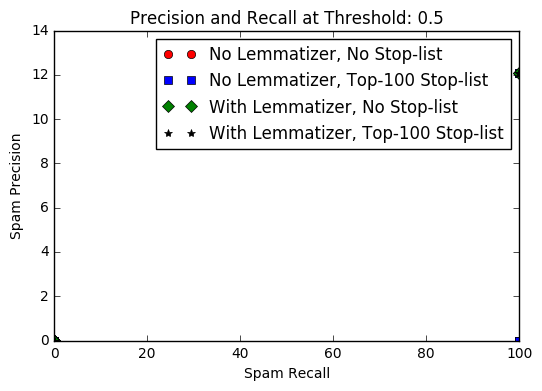

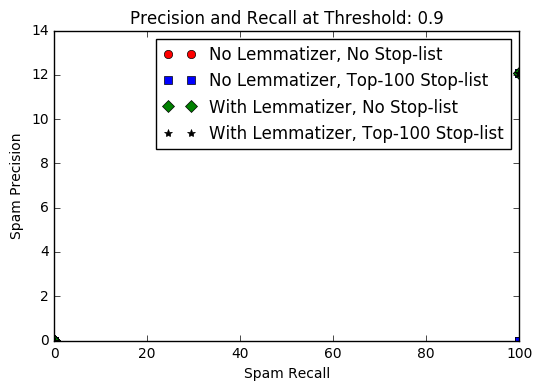

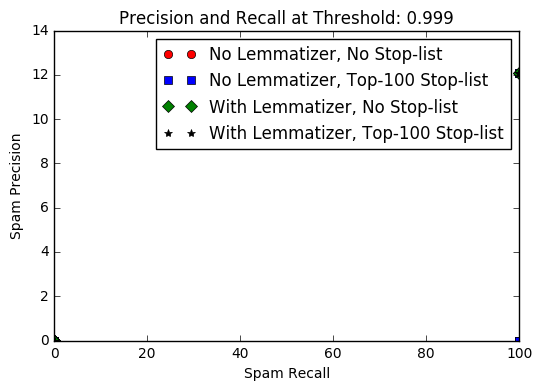

In [10]:
for t in [0.5, 0.9, 0.999]:
    plotThresh(t, bareResults['Spam Precision'], bareResults['Spam Recall'], 
               lemmResults['Spam Precision'], bareResults['Spam Recall'], 
               lemm_stopResults['Spam Precision'], lemm_stopResults['Spam Recall'], 
               stopResults['Spam Precision'], stopResults['Spam Recall'])

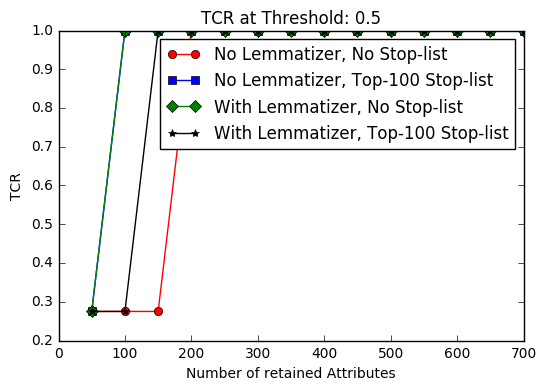

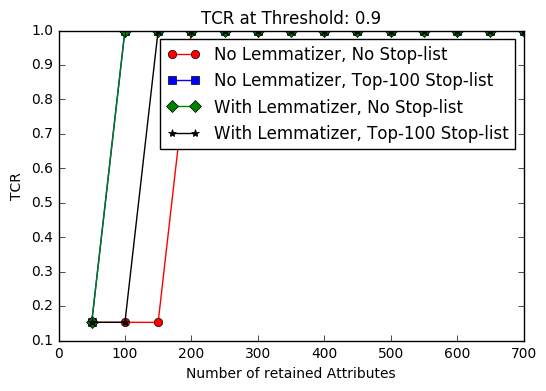

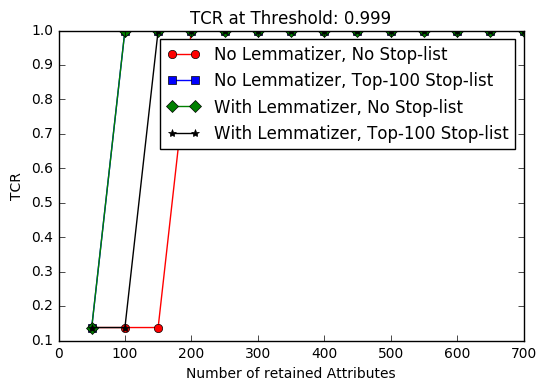

In [9]:


for t in [0.500, 0.900, 0.999]:
    BTCR = bareResults['TCR'].loc[bareResults['Threshold'] == t]
    LTCR = lemmResults['TCR'].loc[lemmResults['Threshold'] == t]
    LSTCR = lemm_stopResults['TCR'].loc[lemm_stopResults['Threshold'] == t]
    STCR = stopResults['TCR'].loc[stopResults['Threshold'] == t]
    
    plotTCR(t, BTCR, 
               LTCR, 
               LSTCR, 
               STCR)

The performancce of our classifier is bad due to the fact that we assumed the probability of a document to be a given class 0, everytime the number gets so small that it becomes 0